## Load Dataset

In [1]:
import pandas as pd
heart_failures_df = pd.read_csv('https://raw.githubusercontent.com/AswiniPusuluri/D220_Datasets/master/heart_failure.csv')  
heart_failures_df = heart_failures_df.rename(columns={"DEATH_EVENT":"death_event"})
heart_failures_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [2]:
heart_failures_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  death_event               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


### Deleting columns which have boolean values 

Deleting the below columns as they are boolean values and are not appropriate for calculating statistics

In [3]:
heart_failures_df_without_booleans = heart_failures_df.drop(['anaemia','diabetes','high_blood_pressure','sex','smoking','death_event'],axis=1)

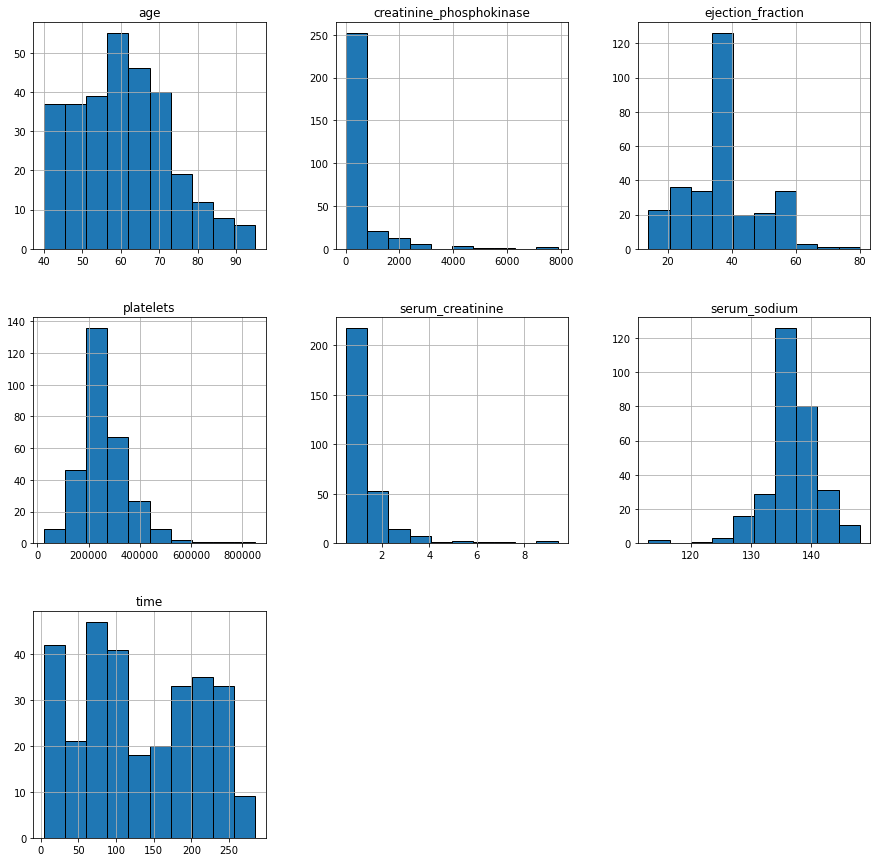

In [4]:
heart_failures_df_without_booleans.hist(figsize=(15,15),edgecolor='black');

In [5]:
correlation=heart_failures_df_without_booleans.corr()
correlation

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
age,1.000000,-0.081584,0.060098,-0.052354,0.159187,-0.045966,-0.224068
creatinine_phosphokinase,-0.081584,1.000000,-0.044080,0.024463,-0.016408,0.059550,-0.009346
ejection_fraction,0.060098,-0.044080,1.000000,0.072177,-0.011302,0.175902,0.041729
platelets,-0.052354,0.024463,0.072177,1.000000,-0.041198,0.062125,0.010514
serum_creatinine,0.159187,-0.016408,-0.011302,-0.041198,1.000000,-0.189095,-0.149315
serum_sodium,-0.045966,0.059550,0.175902,0.062125,-0.189095,1.000000,0.087640
time,-0.224068,-0.009346,0.041729,0.010514,-0.149315,0.087640,1.000000


# Charts

Text(0.5, 1.0, '% of deaths')

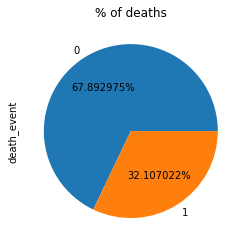

In [6]:
from matplotlib import pyplot as plt
heart_failures_df.death_event.value_counts().plot.pie(autopct='%1f%%')
plt.title('% of deaths')

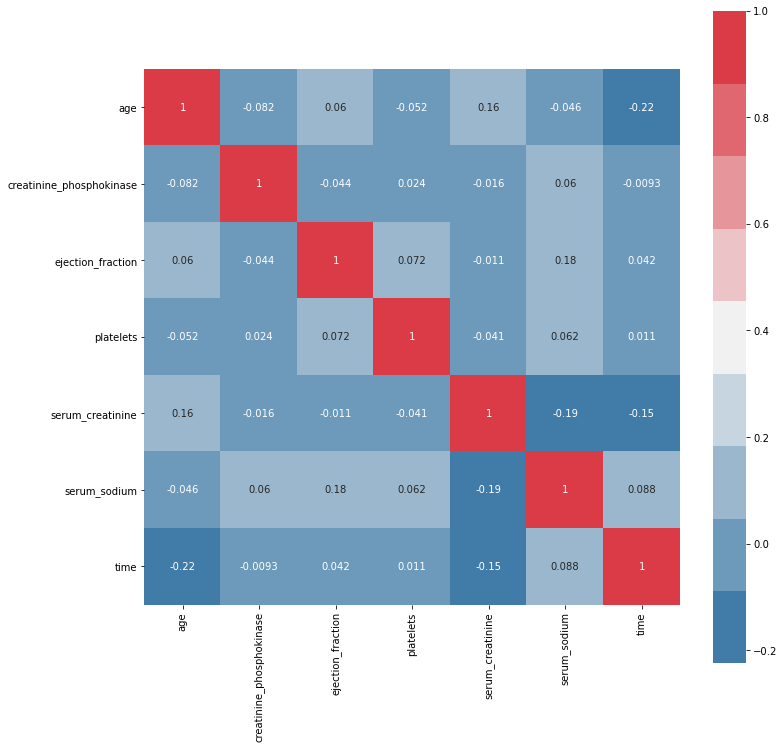

In [7]:
import seaborn as sns
div_pallet=sns.diverging_palette(240, 10, n=9)
plt.subplots(figsize=(12,12))
sns.heatmap(correlation,cmap= div_pallet,annot=True, square=True);

Text(0.5, 1.0, 'Distribution Of Age')

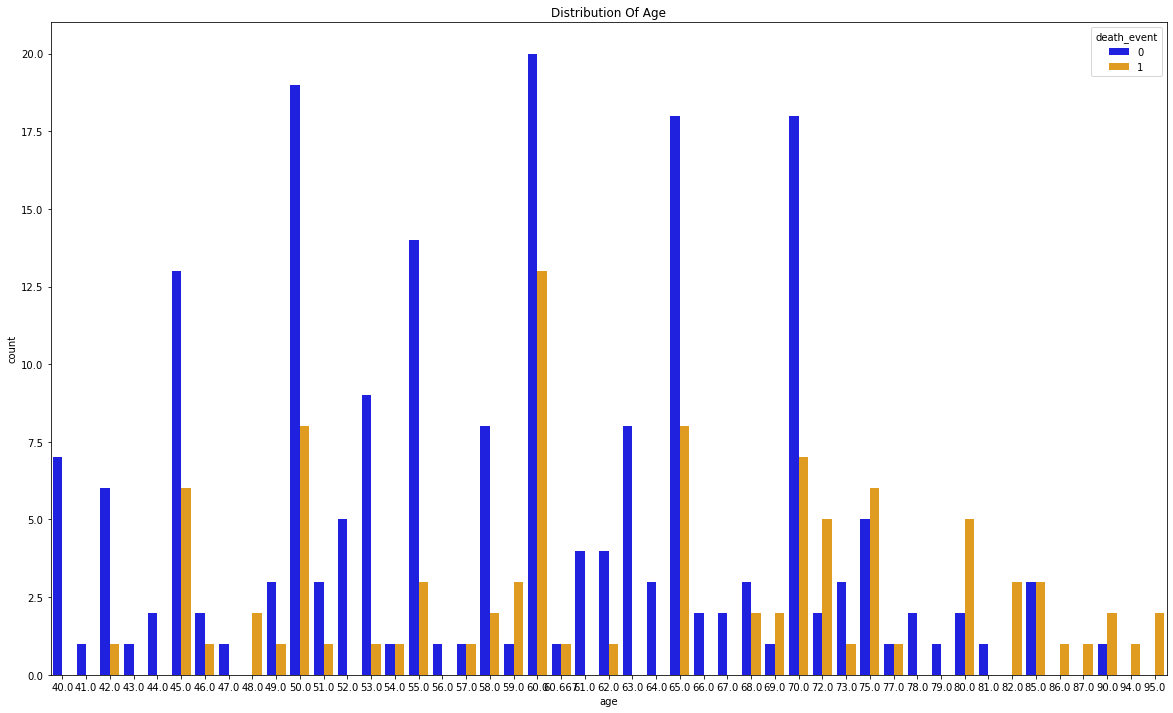

In [8]:
plt.figure(figsize=(20,12))
cols= ["blue","orange"]
Dist_age=sns.countplot(x=heart_failures_df['age'],data=heart_failures_df, hue ="death_event",palette = cols)
Dist_age.set_title("Distribution Of Age")

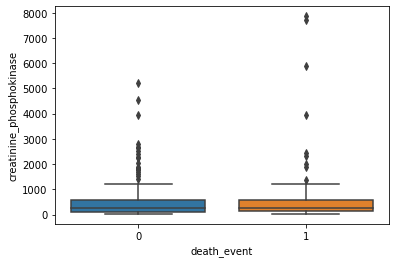

In [9]:
boxplot_creatinine_p = sns.boxplot(y='creatinine_phosphokinase', x='death_event', data=heart_failures_df)

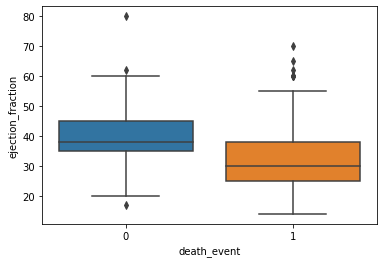

In [10]:

box_ejection_fraction = sns.boxplot(y='ejection_fraction', x='death_event', data=heart_failures_df)

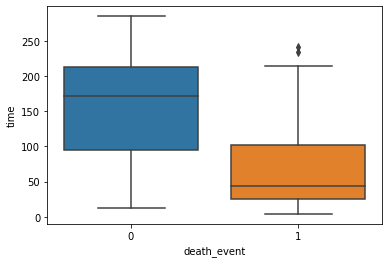

In [11]:
box_time = sns.boxplot(y='time', x='death_event', data=heart_failures_df)

<AxesSubplot:xlabel='death_event', ylabel='platelets'>

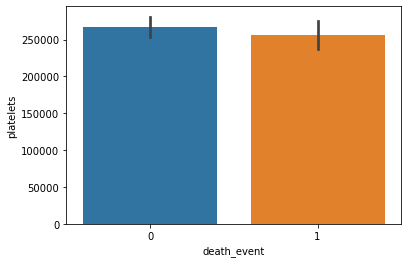

In [12]:
sns.barplot(x='death_event',y='platelets',data=heart_failures_df)

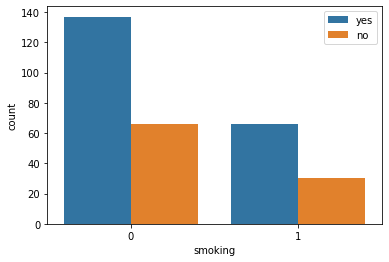

In [13]:
import seaborn as sns
sns.countplot(x='smoking', hue='death_event', data=heart_failures_df)
plt.legend(['yes','no'])

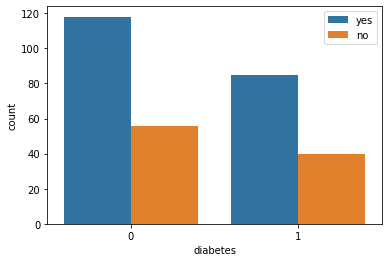

In [14]:
sns.countplot(x='diabetes',hue='death_event',data=heart_failures_df)
plt.legend(['yes','no'])

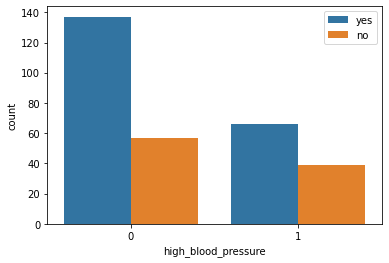

In [15]:
sns.countplot(x='high_blood_pressure',hue='death_event',data=heart_failures_df)
plt.legend(['yes','no'])

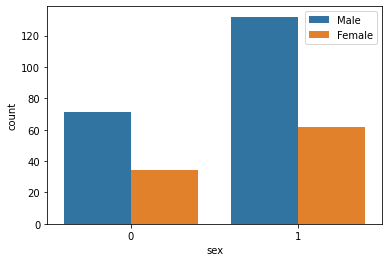

In [16]:
import seaborn as sns
sns.countplot(x='sex', hue='death_event', data=heart_failures_df)
plt.legend(['Male','Female'])